# Analise da serie temporal 03
## Cotacao do Fundo de Investimento de Acoes

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_original = pd.read_csv('../data/fundo02-cotas-acoes.csv', header=0, encoding='iso-8859-1')

arima.print_dataframe_info(df_original)

SHAPE: (894, 9)

DTYPES: Código       int64
Fundo       object
Data        object
Cota        object
Variação    object
Captação    object
Resgate     object
PL          object
Cotistas     int64
dtype: object

##########################################################################################
HEAD 

   Código                                              Fundo        Data  \
0   33293  1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...  27/09/2018   
1   33293  1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...  26/09/2018   
2   33293  1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...  25/09/2018   
3   33293  1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...  24/09/2018   
4   33293  1421 FUNDO DE INVESTIMENTO DE AÇÕES INVESTIMEN...  21/09/2018   

        Cota Variação Captação  Resgate                PL  Cotistas  
0  3,4069383    1,50%  R$ 0,00  R$ 0,00  R$ 13.828.285,51         5  
1  3,3564659    0,11%  R$ 0,00  R$ 0,00  R$ 13.623.425,12         5  
2   3,352638   -0,10%  R

In [3]:
# axis=1 diz que estou removendo colunas
df_daily = df_original.drop('Código', axis=1)
df_daily = df_daily.drop('Fundo', axis=1)
df_daily = df_daily.drop('Variação', axis=1)
df_daily = df_daily.drop('Captação', axis=1)
df_daily = df_daily.drop('Resgate', axis=1)
df_daily = df_daily.drop('PL', axis=1)
df_daily = df_daily.drop('Cotistas', axis=1)

arima.print_dataframe_info(df_daily)

SHAPE: (894, 2)

DTYPES: Data    object
Cota    object
dtype: object

##########################################################################################
HEAD 

         Data       Cota
0  27/09/2018  3,4069383
1  26/09/2018  3,3564659
2  25/09/2018   3,352638
3  24/09/2018  3,3559605
4  21/09/2018  3,4016722


##########################################################################################
TAIL 

           Data       Cota
889  12/03/2015  2,3959649
890  11/03/2015  2,3882901
891  10/03/2015   2,374273
892  09/03/2015  2,3908835
893  06/03/2015  2,4105934


In [4]:
df_daily['Data'] = pd.to_datetime(df_daily['Data'], format='%d/%m/%Y')
df_daily.index = df_daily['Data']
del df_daily['Data']

arima.print_dataframe_info(df_daily)

SHAPE: (894, 1)

DTYPES: Cota    object
dtype: object

##########################################################################################
HEAD 

                 Cota
Data                 
2018-09-27  3,4069383
2018-09-26  3,3564659
2018-09-25   3,352638
2018-09-24  3,3559605
2018-09-21  3,4016722


##########################################################################################
TAIL 

                 Cota
Data                 
2015-03-12  2,3959649
2015-03-11  2,3882901
2015-03-10   2,374273
2015-03-09  2,3908835
2015-03-06  2,4105934


In [5]:
df_daily['Cota'] = df_daily['Cota'].apply(lambda x: float(x.replace(',', '.')))
df_daily['Cota'] = df_daily['Cota'].astype(float)

arima.print_dataframe_info(df_daily)

SHAPE: (894, 1)

DTYPES: Cota    float64
dtype: object

##########################################################################################
HEAD 

                Cota
Data                
2018-09-27  3.406938
2018-09-26  3.356466
2018-09-25  3.352638
2018-09-24  3.355961
2018-09-21  3.401672


##########################################################################################
TAIL 

                Cota
Data                
2015-03-12  2.395965
2015-03-11  2.388290
2015-03-10  2.374273
2015-03-09  2.390884
2015-03-06  2.410593


In [6]:
#df2 = df2.sort_values('Data')
# esse comando executa o sort e preenche as datas que faltam
df_daily = df_daily.resample('D').ffill()

arima.print_dataframe_info(df_daily)

SHAPE: (1302, 1)

DTYPES: Cota    float64
dtype: object

##########################################################################################
HEAD 

                Cota
Data                
2015-03-06  2.410593
2015-03-07  2.410593
2015-03-08  2.410593
2015-03-09  2.390884
2015-03-10  2.374273


##########################################################################################
TAIL 

                Cota
Data                
2018-09-23  3.401672
2018-09-24  3.355961
2018-09-25  3.352638
2018-09-26  3.356466
2018-09-27  3.406938


In [7]:
# existe alguma data com valor NAN?
# tem de ser False
print(df_daily.isnull().values.any())

False


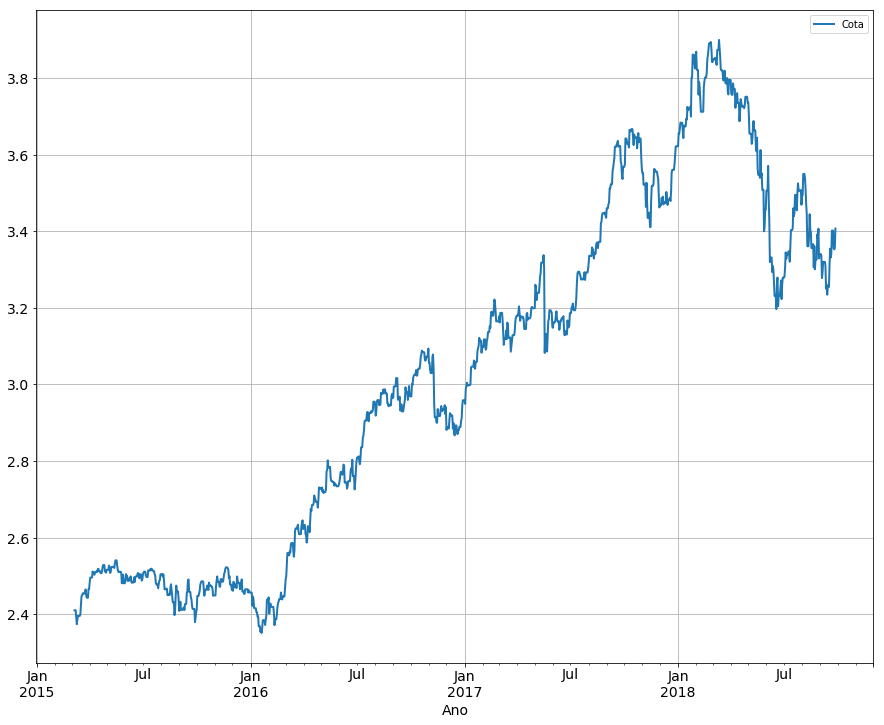

In [8]:
timeseries.plot_timeserie(df_daily)

In [9]:
# estou trabalhando com dados de 3 anos
df_daily = df_daily['2015-09-27':]

arima.print_dataframe_info(df_daily)

SHAPE: (1097, 1)

DTYPES: Cota    float64
dtype: object

##########################################################################################
HEAD 

                Cota
Data                
2015-09-27  2.413997
2015-09-28  2.379622
2015-09-29  2.390931
2015-09-30  2.406271
2015-10-01  2.412294


##########################################################################################
TAIL 

                Cota
Data                
2018-09-23  3.401672
2018-09-24  3.355961
2018-09-25  3.352638
2018-09-26  3.356466
2018-09-27  3.406938


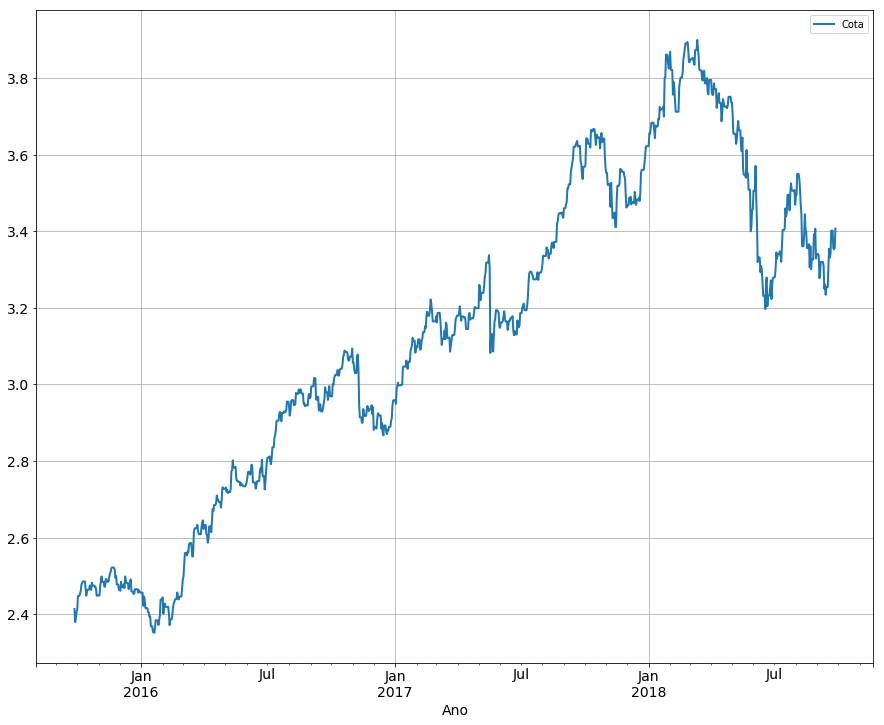

In [10]:
timeseries.plot_timeserie(df_daily)

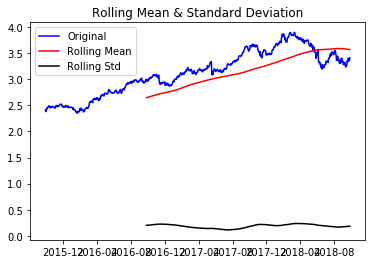

Results of Dickey-Fuller Test:
Test Statistic (-1.458748) > Critical Value 1 (-3.436453)
Test Statistic (-1.458748) > Critical Value 5 (-2.864235)
Test Statistic (-1.458748) > Critical Value 10 (-2.568205)
p-value (0.553810) > 0.05


In [11]:
timeseries.check_stationarity(df_daily, window=365)

In [12]:
df_monthly = df_daily.resample('M')
df_monthly = df_monthly.mean()

In [13]:
arima.print_dataframe_info(df_monthly)

SHAPE: (37, 1)

DTYPES: Cota    float64
dtype: object

##########################################################################################
HEAD 

                Cota
Data                
2015-09-30  2.397705
2015-10-31  2.465097
2015-11-30  2.490919
2015-12-31  2.469954
2016-01-31  2.402781


##########################################################################################
TAIL 

                Cota
Data                
2018-05-31  3.589007
2018-06-30  3.312490
2018-07-31  3.414903
2018-08-31  3.404918
2018-09-30  3.322405


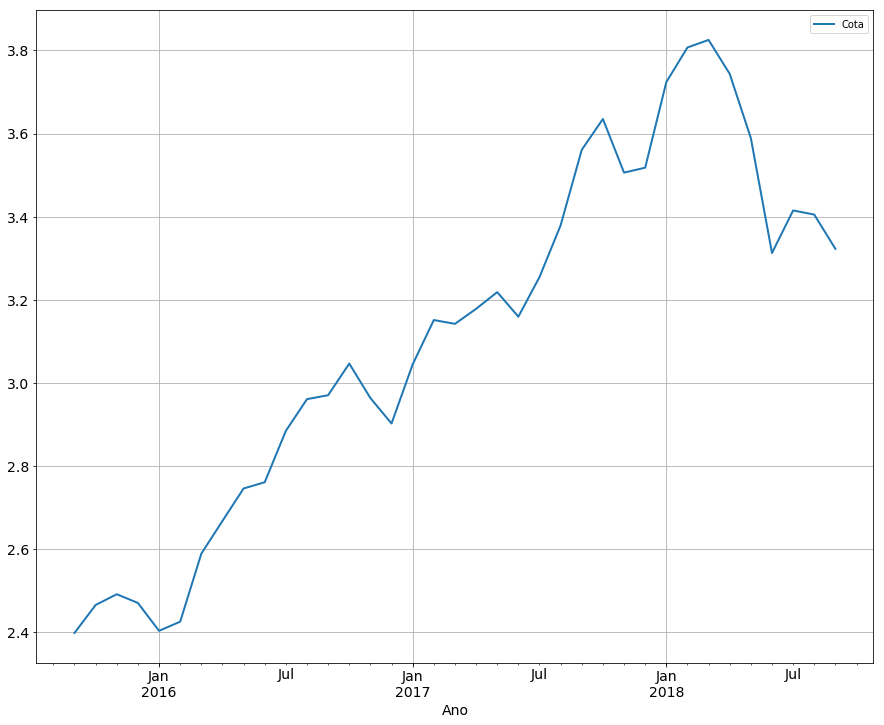

In [14]:
timeseries.plot_timeserie(df_monthly)

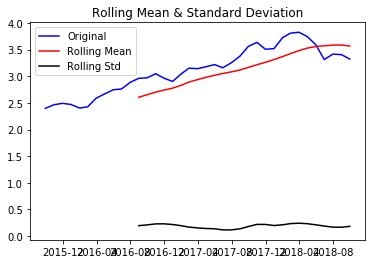

Results of Dickey-Fuller Test:
Test Statistic (-1.536601) > Critical Value 1 (-3.632743)
Test Statistic (-1.536601) > Critical Value 5 (-2.948510)
Test Statistic (-1.536601) > Critical Value 10 (-2.613017)
p-value (0.515334) > 0.05


In [15]:
timeseries.check_stationarity(df_monthly, window=12)

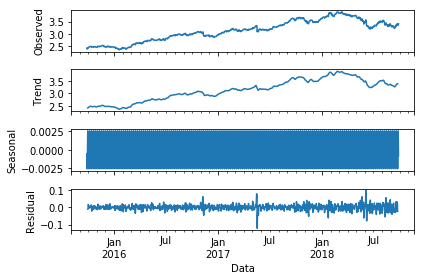

In [16]:
result = seasonal_decompose(df_daily, model='additive')
result.plot()
plt.show()

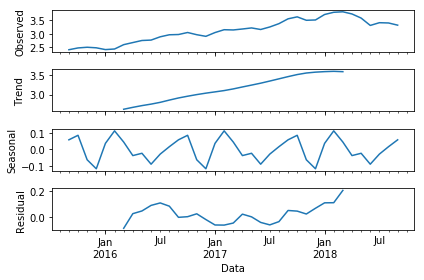

In [17]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()